In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
IMAGE_1_PATH = './data/1_1.jpg'
IMAGE_2_PATH = './data/1_2.jpg'

In [3]:
image_1 = cv2.cvtColor(cv2.imread(IMAGE_1_PATH), cv2.COLOR_BGR2RGB)
image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)

image_2 = cv2.cvtColor(cv2.imread(IMAGE_2_PATH), cv2.COLOR_BGR2RGB)
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

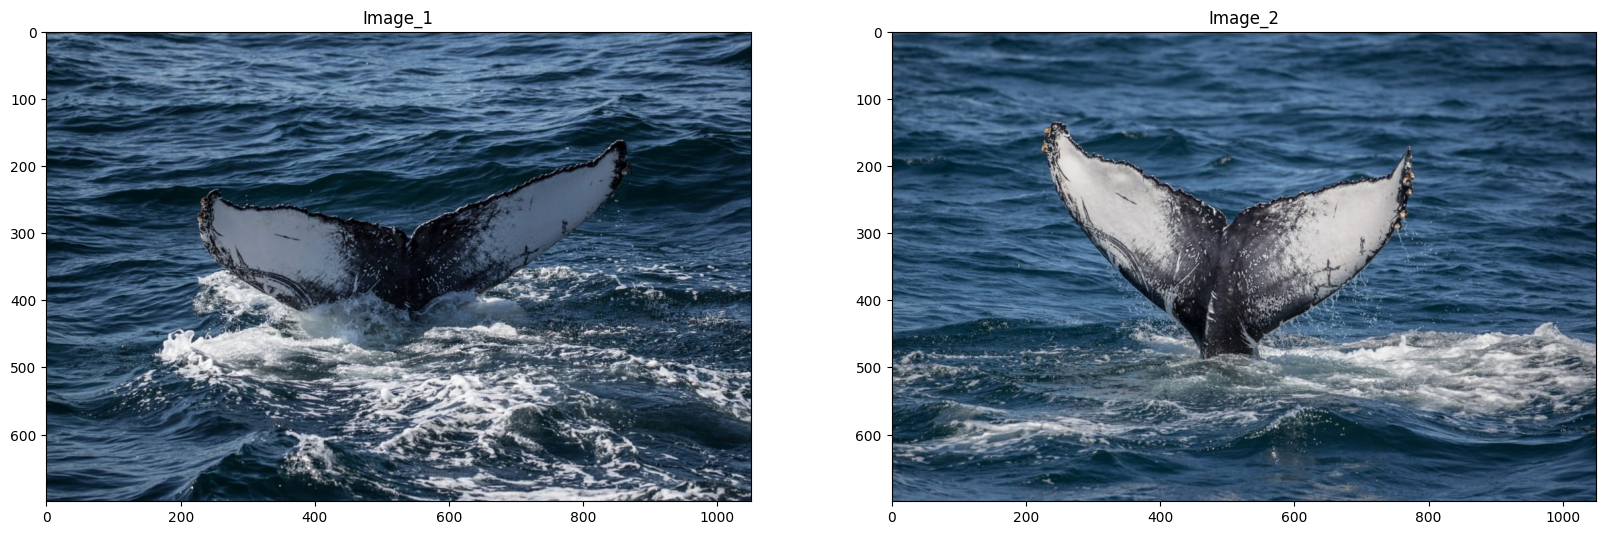

In [4]:
_, plots = plt.subplots(1, 2, figsize=(20, 15))
plots[0].set_title("Image_1")
plots[0].imshow(image_1)
plots[1].set_title("Image_2")
plots[1].imshow(image_2)

In [5]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(image_1_gray, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2_gray, None)

Number of Keypoints Detected In The Training Image 1:  8816
Number of Keypoints Detected In The Training Image 2:  6233


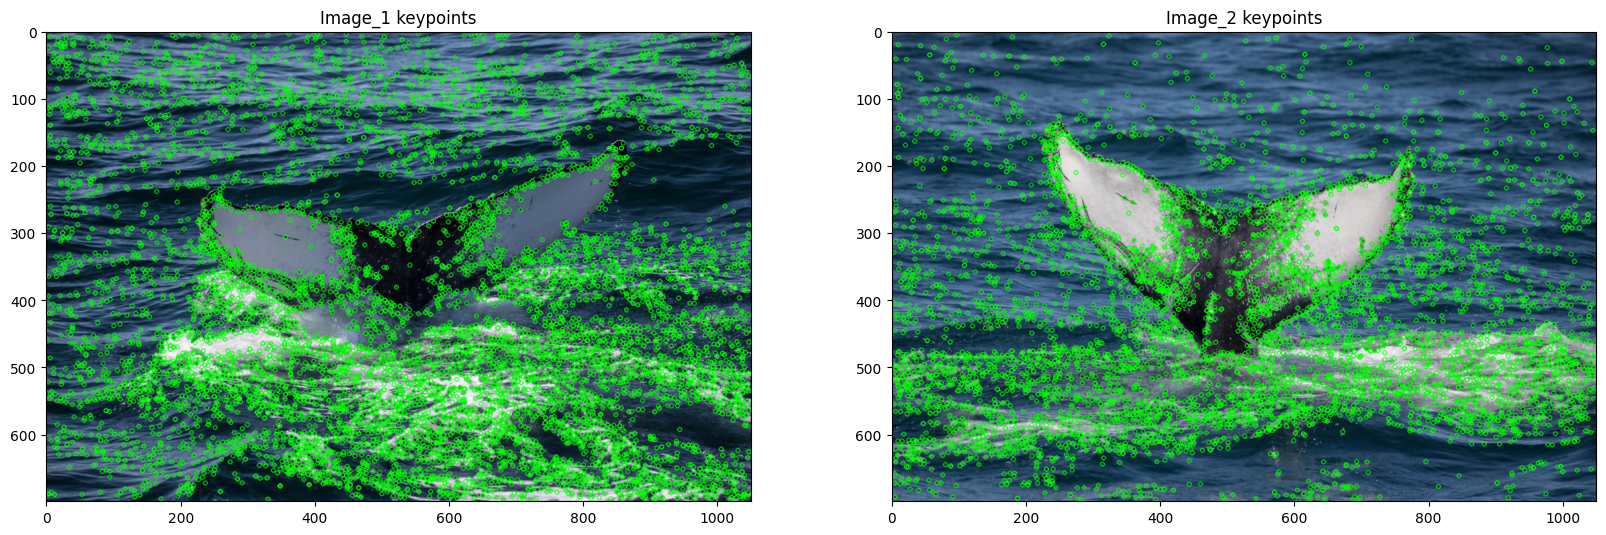

In [6]:
image_1_with_features = image_1.copy()
image_2_with_features = image_2.copy()

cv2.drawKeypoints(image_1, keypoints_1, image_1_with_features, color=(0, 255, 0))
cv2.drawKeypoints(image_2, keypoints_2, image_2_with_features, color=(0, 255, 0))

_, plots = plt.subplots(1, 2, figsize=(20, 15))
plots[0].set_title("Image_1 keypoints")
plots[0].imshow(image_1_with_features)
plots[1].set_title("Image_2 keypoints")
plots[1].imshow(image_2_with_features)

print("Number of Keypoints Detected In The Training Image 1: ", len(keypoints_1))
print("Number of Keypoints Detected In The Training Image 2: ", len(keypoints_2))

In [7]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors_1, descriptors_2, k=2)

# FLANN_INDEX_KDTREE = 1
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# search_params = dict(checks=50)   # or pass empty dictionary
# flann = cv2.FlannBasedMatcher(index_params,search_params)
# matches = flann.knnMatch(descriptors_1,descriptors_2,k=2)

matches_filtered = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        matches_filtered.append(m)

len(matches), len(matches_filtered)

(8816, 142)

Same whale


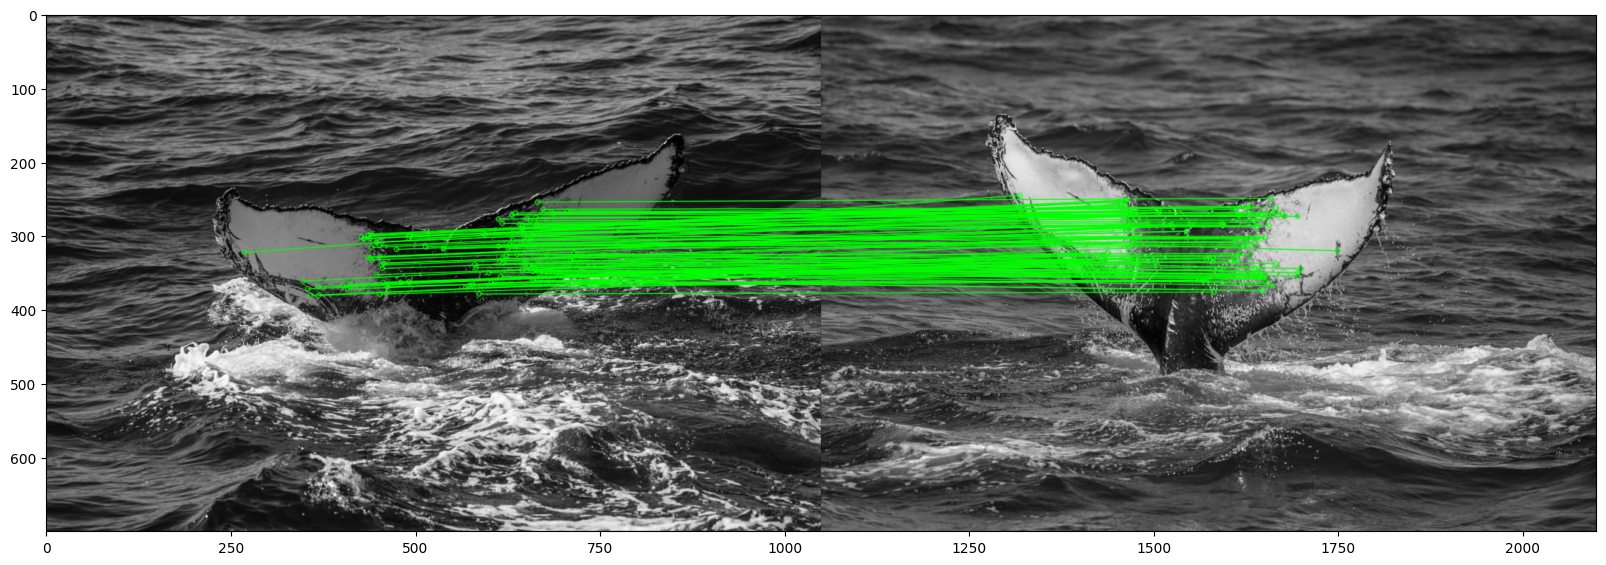

In [9]:
det = 0
matches_mask = None

if len(matches_filtered) > 3:
    src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches_filtered]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches_filtered]).reshape(-1, 1, 2)
    
    homography_matrix, homography_mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matches_mask = homography_mask.ravel().tolist()

    det = np.linalg.det(homography_matrix)
    
if -0.01 < det < 0.01:
    print('Different whale')
else:
    print('Same whale')

draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matches_mask, flags=2)
image_output = cv2.drawMatches(image_1_gray, keypoints_1, image_2_gray, keypoints_2, matches_filtered, None, **draw_params)

plt.rcParams['figure.figsize'] = 20, 10
plt.imshow(image_output)
plt.show()